# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [1]:
from scipy import misc, ndimage
import numpy as np
import matplotlib.pyplot as plt

# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

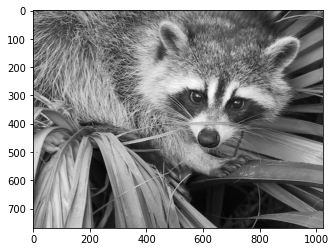

In [2]:
# X = poza raton
X = misc.face(gray=True)
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata Fourier a unei imagini

Transformata Fourier Discretă se extinde ușor la mai multe dimensiuni. Pentru un semnal bidimensional precum o imagine DFT devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}\sum_{n_2=0}^{N_2-1}x_{n_1,n_2}e^{-j2\pi(m_1 n_1/N_1 + m_2 n_2/N_2)}
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric
* proprietățile transformatei DFT 1D sunt respectate și în cazul celei 2D

În continuare vom folosi rutina generală `fft2` ce servește mai bine activității de învățare, deși pentru semnale reale ar trebui să folosim `rfft2` ce întoarce doar informația esențială (ex. omite simetriile). De asemenea vom analiza spectrul în scală logaritmică pentru a diferenția mai bine magnitudinile bin-urilor DTF.

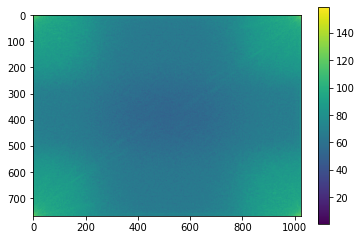

In [3]:
# Y = poza raton in fft
Y = np.fft.fft2(X)
# freq_db = Y in scala logaritmica
freq_db = 20*np.log10(abs(Y))
plt.imshow(freq_db)
plt.colorbar()
plt.show()

Operațiile efectuate direct asupra imaginii se reflectă și în spectrul acesteia. Iată un exemplu a unei rotații de 45 de grade:

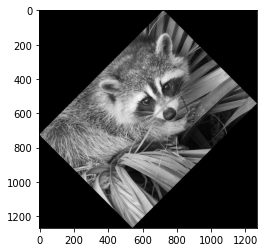

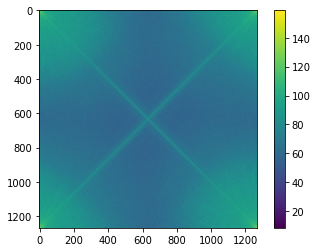

In [4]:
rotate_angle = 45
X45 = ndimage.rotate(X, rotate_angle)
plt.imshow(X45, cmap=plt.cm.gray)
plt.show()

Y45 = np.fft.fft2(X45)
plt.imshow(20*np.log10(abs(Y45)))
plt.colorbar()
plt.show()

Momentan pe axe sunt afișate numărul bin-urilor. Pentru a obține frecvențele asociate folosiți `fftfreq`:

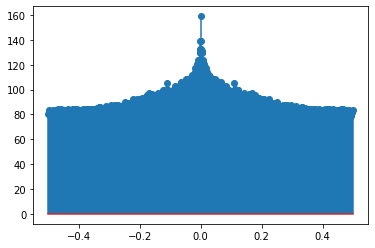

In [5]:
freq_x = np.fft.fftfreq(X.shape[1])
freq_y = np.fft.fftfreq(X.shape[0])

plt.stem(freq_x, freq_db[:][0])
plt.show()

# Atenuarea frecvențelor înalte

Pentru a anula frecvențele de peste un anumit prag `freq_cutoff` putem pur și simplu anula intrările din spectru și aplica transformata Fourier inversă:

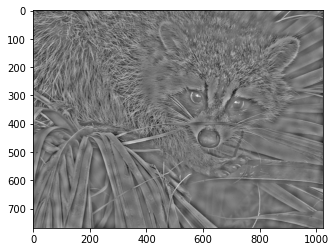

In [7]:
freq_cutoff = 113


X = misc.face(gray=True)
Y = np.fft.fft2(X)
# freq_db = Y in scala logaritmica
freq_db = 20*np.log10(abs(Y))
# Y = poza raton in fft
Y_cutoff = Y.copy()
# freq_db = Y in scala logaritmica
Y_cutoff[freq_db > freq_cutoff] = 0
X_cutoff = np.fft.ifft2(Y_cutoff)
X_cutoff = np.real(X_cutoff)    # avoid rounding erros in the complex domain,
                                # in practice use irfft2
plt.imshow(X_cutoff, cmap=plt.cm.gray)
plt.show()

# Zgomot

Zgomotul alb perturbă în mod egal spectrul semnalului. Este astfel egal distribuit și regăsit în toate bin-urile DFT. [Zgomotul color](https://en.wikipedia.org/wiki/Colors_of_noise) se schimbă de-a lungul frecvențelor.

Putem adăuga zgomot în limita a `pixel_noise` pixeli imaginii folosind `random.randint`:

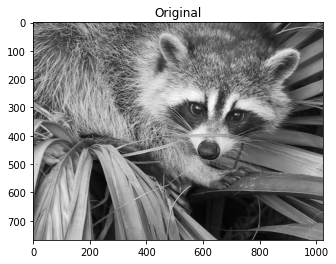

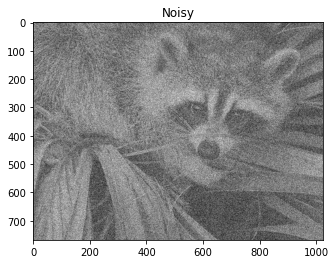

In [8]:
pixel_noise = 200

noise = np.random.randint(-pixel_noise, high=pixel_noise+1, size=X.shape)
X_noisy = X + noise
plt.imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.show()
plt.imshow(X_noisy, cmap=plt.cm.gray)
plt.title('Noisy')
plt.show()

# Sarcini

1. [8p] Produceți imaginile și spectrul pentru funcțiile de mai jos și dați o explicație scurtă pentru fiecare rezultat.
* $x_{n_1,n_2} = \sin(2\pi n_1 + 3\pi n_2)$
* $x_{n_1,n_2} = \sin(4\pi n_1) + \cos(6\pi n_2)$
* $Y_{0,5} = Y_{0,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,0} = Y_{N-5,0} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,5} = Y_{N-5,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$

*Atenție*: $x$ reprezintă informație în domeniul timpului, $Y$ în domeninul frecvenței.

2. [4p] Comprimați imaginea cu ratonul de mai sus prin atenuarea frecvențelor înalte până la un prag SNR autoimpus.

3. [4p] Eliminați zgomotul adăugat la imaginea cu ratonul produsă mai sus. Prezentați raportul SNR înainte și după.

4. [4p] Alegeți o secvență scurtă de timp (ex. 5-10 secunde) și eliminați un instrument la alegere din semnalul audio rezultat în urma rezolvării sarcinilor de la [laboratorul 3](https://cs.unibuc.ro/~pirofti/ps/ps-lab-3.pdf).

### Problema 1

Produceți imaginile și spectrul pentru funcțiile de mai jos și dați o explicație scurtă pentru fiecare rezultat.
* $x_{n_1,n_2} = \sin(2\pi n_1 + 3\pi n_2)$
* $x_{n_1,n_2} = \sin(4\pi n_1) + \cos(6\pi n_2)$
* $Y_{0,5} = Y_{0,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,0} = Y_{N-5,0} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,5} = Y_{N-5,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$

*Atenție*: $x$ reprezintă informație în domeniul timpului, $Y$ în domeninul frecvenței.

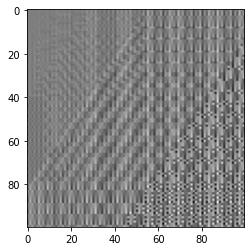

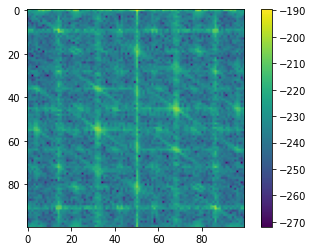

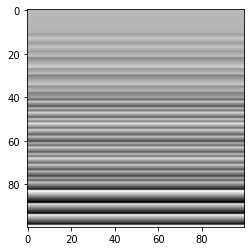

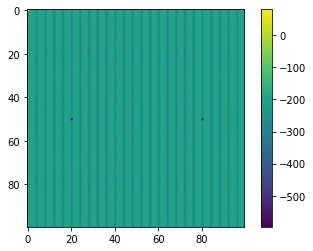

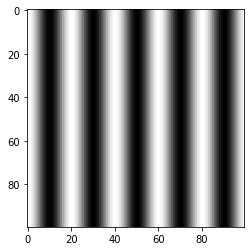

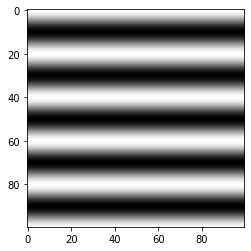

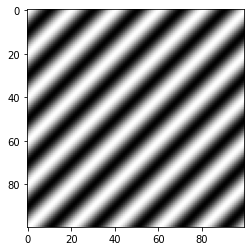

In [9]:
import numpy as np
import matplotlib.pyplot as plt


def sine_sine(n1, n2):
    x = np.ndarray(n1 * n2).reshape(n1,n2)
    for i in range(n1):
        for j in range(n2):
            x[i][j] = np.sin(2 * np.pi * i + 3 * np.pi * j)
    return x

def sine_cos(n1, n2):    
    x = np.ndarray(n1 * n2).reshape(n1,n2)
    for i in range(n1):
        for j in range(n2):
            x[i][j] = np.sin(4 * np.pi * i) + np.cos(6 * np.pi * j)
    return x

def y05(m1, m2):
    Y = np.zeros((m1,m2))
    Y[0][5] = Y[0][m2-5] = 1
    return Y

def y50(m1, m2):
    Y = np.zeros((m1,m2))
    Y[5][0] = Y[m1-5][0] = 1
    return Y

def y55(m1, m2):
    Y = np.zeros((m1,m2))
    Y[5][5] = Y[m1-5][m2-5] = 1
    return Y


x_sine_sine = sine_sine(100,100)
plt.imshow(x_sine_sine, cmap=plt.cm.gray)
plt.show()
log_Y_x_sine_sine = 20*np.log10(abs(np.fft.fft2(x_sine_sine)))
plt.imshow(log_Y_x_sine_sine)
plt.colorbar()
plt.show()

x_sine_cos = sine_cos(100,100)
plt.imshow(x_sine_cos, cmap=plt.cm.gray)
plt.show()
Y_x_sine_cos = np.fft.fft2(x_sine_cos)
# apareau valori de 0 in log10, asa ca a trebuit sa le modific ca sa mearga cu 10 ** -10
not_zero = 10 ** -10
Y_x_sine_cos[Y_x_sine_cos == 0] = not_zero
plt.imshow(20 * np.log10(abs(Y_x_sine_cos)))
plt.colorbar()
plt.show()

Y05 = y05(100,100)
x05 = np.fft.ifft2(Y05)
x05 = np.real(x05)
plt.imshow(x05,cmap=plt.cm.gray)
plt.show()

Y50 = y50(100,100)
x50 = np.fft.ifft2(Y50)
x50 = np.real(x50)
plt.imshow(x50,cmap=plt.cm.gray)
plt.show()

Y55 = y55(100,100)
x55 = np.fft.ifft2(Y55)
x55 = np.real(x55)
plt.imshow(x55,cmap=plt.cm.gray)
plt.show()

### Problema 2

Comprimați imaginea cu ratonul de mai sus prin atenuarea frecvențelor înalte până la un prag SNR autoimpus.

In [10]:
from scipy import misc, ndimage
import numpy as np
import matplotlib.pyplot as plt

First ideal SNR: 0.10369665283177132 
Ideal frequency cutoff: 121


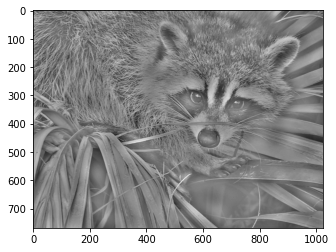

In [12]:
def signal_to_noise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis=axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)


X = misc.face(gray=True)
Y = np.fft.fft2(X)
# freq_db = Y in scala logaritmica
freq_db = 20*np.log10(abs(Y))

ideal_SNR = 0.1

freq_cutoff = 1

Y_cutoff = Y.copy()
Y_cutoff[freq_db > freq_cutoff] = 0
X_cutoff = np.fft.ifft2(Y_cutoff)
X_cutoff = np.real(X_cutoff)    # avoid rounding erros in the complex domain,
                                # in practice use irfft2
# print(f"{signal_to_noise(X_cutoff, axis=None):.9f}")

SNR = np.mean(abs(signal_to_noise(X_cutoff)))
while(SNR < ideal_SNR and freq_cutoff < 200):
    freq_cutoff += 1
    Y_cutoff = Y.copy()
    Y_cutoff[freq_db > freq_cutoff] = 0
    X_cutoff = np.fft.ifft2(Y_cutoff)
    X_cutoff = np.real(X_cutoff)    # avoid rounding erros in the complex domain,
                                    # in practice use irfft2
    SNR = np.mean(abs(signal_to_noise(X_cutoff)))
else:
    print("First ideal SNR:", SNR,"\nIdeal frequency cutoff:",freq_cutoff)
#     Y_cutoff = Y.copy()
#     Y_cutoff[freq_db > freq_cutoff] = 0
#     X_cutoff = np.fft.ifft2(Y_cutoff)
#     X_cutoff = np.real(X_cutoff)    # avoid rounding erros in the complex domain,
#                                     # in practice use irfft2
    plt.imshow(X_cutoff, cmap=plt.cm.gray)
    plt.show()

### Problema 3

Eliminați zgomotul adăugat la imaginea cu ratonul produsă mai sus. Prezentați raportul SNR înainte și după.

In [71]:
from scipy import misc, ndimage
import numpy as np
import matplotlib.pyplot as plt

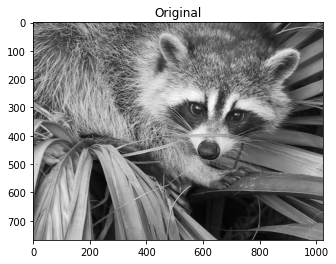

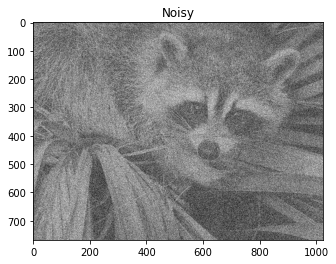

SNR before:  0.8997019763280191


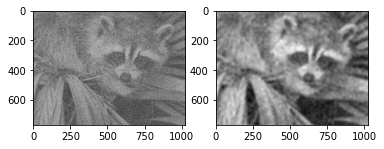

SNR after:  2.778129372769084


In [13]:
def signal_to_noise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis=axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)


X = misc.face(gray=True)
pixel_noise = 200

noise = np.random.randint(-pixel_noise, high=pixel_noise+1, size=X.shape)
X_noisy = X + noise
plt.imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.show()
plt.imshow(X_noisy, cmap=plt.cm.gray)
plt.title('Noisy')
plt.show()

print("SNR before: ", np.mean(abs(signal_to_noise(X_noisy))))

fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
media_X_noisy = ndimage.median_filter(X_noisy, size=20)
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ax1.imshow(X_noisy)
ax2.imshow(media_X_noisy)
plt.show()
print("SNR after: ", np.mean(abs(signal_to_noise(media_X_noisy))))

### Problema 4

Alegeți o secvență scurtă de timp (ex. 5-10 secunde) și eliminați un instrument la alegere din semnalul audio rezultat în urma rezolvării sarcinilor de la [laboratorul 3](https://cs.unibuc.ro/~pirofti/ps/ps-lab-3.pdf).

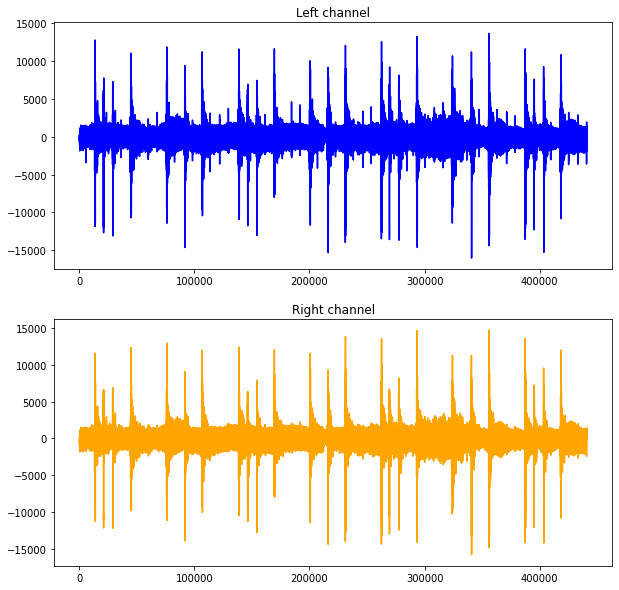

2


In [2]:
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import numpy as np
import sounddevice as sd
samplerate, song = wav.read('ps-lab-3.wav')

start = samplerate * 5
end = samplerate * 15
song = song[start:end]

left = np.array(song[:, 0])
right = np.array(song[:, 1])

fig, ax =  plt.subplots(2, 1, figsize=(10, 10))

ax[0].plot(left, color="blue")
ax[0].set_title("Left channel")
ax[1].plot(right, color="orange")
ax[1].set_title("Right channel")
plt.show()
print(song.shape[1])
sd.play(song, samplerate)

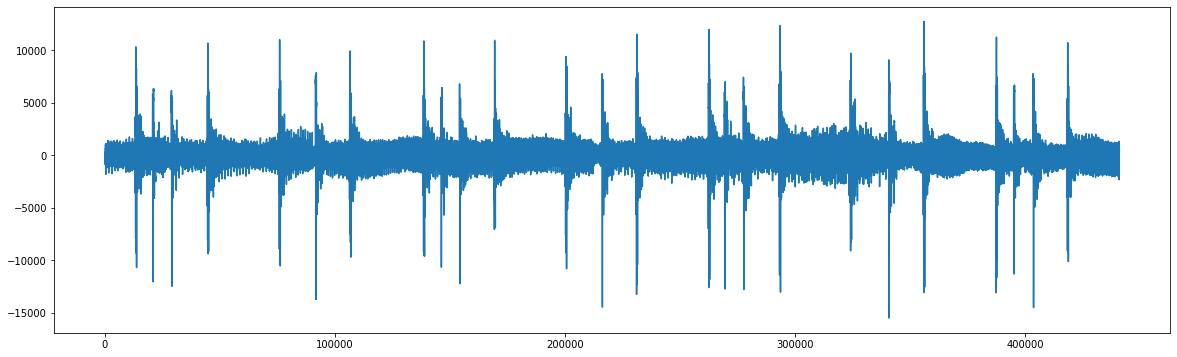

In [327]:
from scipy.signal import medfilt

x_medfilt = medfilt(left, kernel_size=19)
sd.play(x_medfilt, samplerate)

plt.plot(x_medfilt)

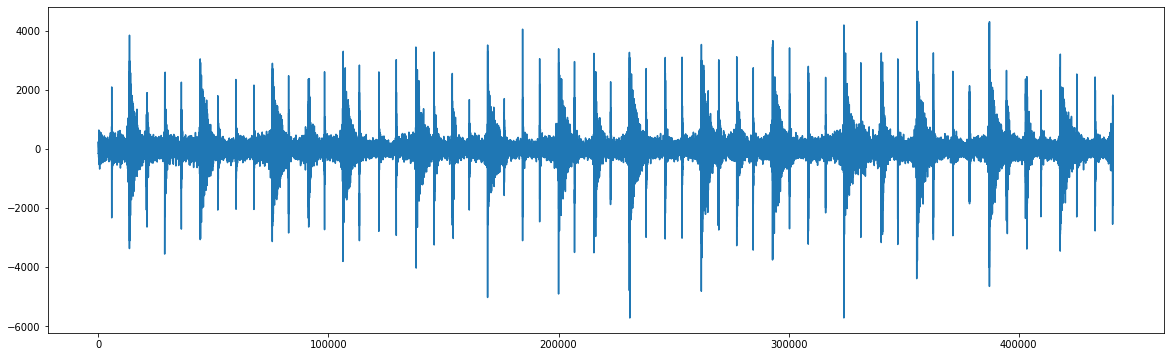

In [328]:
import scipy.signal.windows as windows
freq_cutoff = 125

Y = np.fft.fft(left)
freq_db = 20*np.log10(abs(Y))

Y_cutoff = Y.copy() # okay cu cheby
# Y_cutoff = Y.copy() * np.blackman(len(Y)) # mai bine cu butter
# Y_cutoff = Y.copy() * windows.flattop(len(Y))
Y_cutoff[freq_db > freq_cutoff] = 0
X_cutoff = np.fft.ifft(Y_cutoff)
X_cutoff = np.real(X_cutoff)   
            
plt.plot(X_cutoff)

# auch
sd.play(X_cutoff, samplerate)


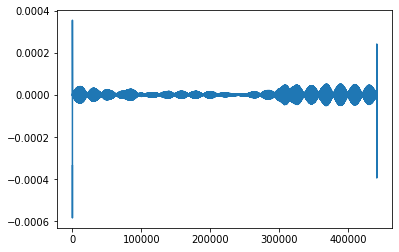

In [19]:
from scipy.signal import filtfilt, cheby1, medfilt, lfilter
b, a = cheby1(3, 3, samplerate / 10, btype='high', fs=samplerate)

# cheby_filtered = lfilter(b, a, X_cutoff) worse
cheby_filtered_left = filtfilt(b, a, X_cutoff)
sd.play(cheby_filtered_left, samplerate)
plt.plot(cheby_filtered_left)

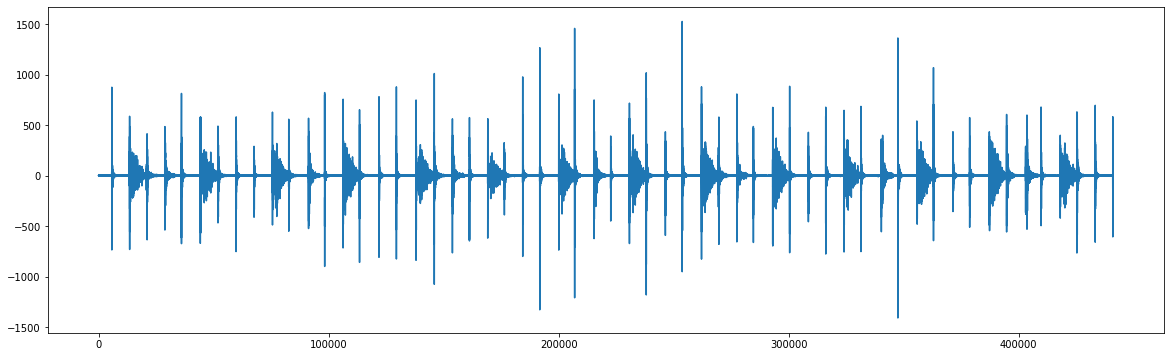

In [330]:
tuned = medfilt(cheby_filtered_left, kernel_size=11)
wav.write('tobe.wav', samplerate, tuned)
plt.plot(tuned)

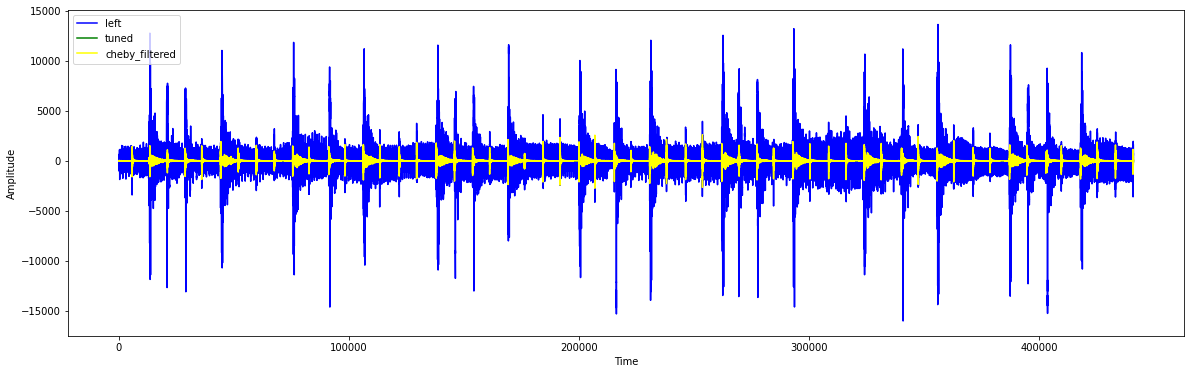

In [331]:
def compare_signals(signals, labels, colors=['blue', 'green', 'yellow', 'cyan', 'magenta', 'red', 'black', 'white'], title=None):
    plt.rcParams["figure.figsize"] = (20, 6)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

    for signal, label, color in zip(signals, labels, colors):
        plt.plot(signal, label=label, color=color)
    plt.legend(loc='upper left')
    plt.show()

compare_signals([left, tuned, cheby_filtered_left], ['left', 'tuned', 'cheby_filtered'])

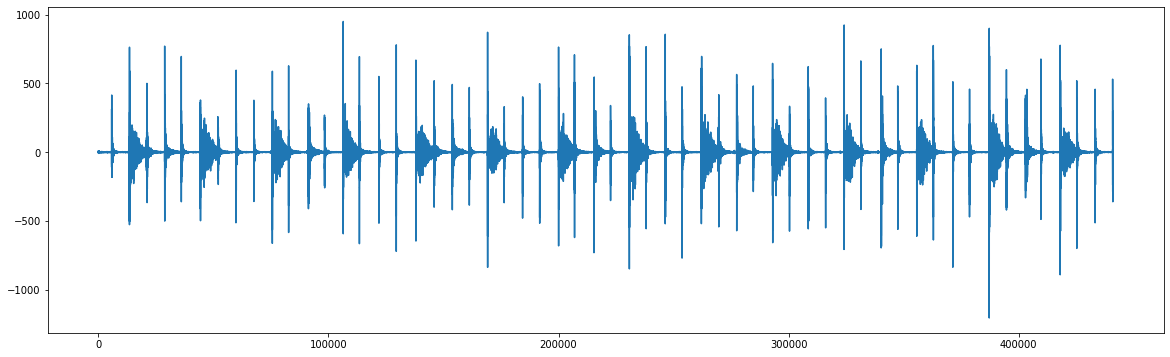

In [332]:
from scipy.signal import butter
b, a = butter(3, samplerate / 10, btype='high', fs=samplerate)
butter_filtered_left = filtfilt(b, a, X_cutoff)
butter_tuned_left = medfilt(butter_filtered_left, kernel_size=7)
sd.play(butter_tuned_left, samplerate)
plt.plot(butter_tuned_left)


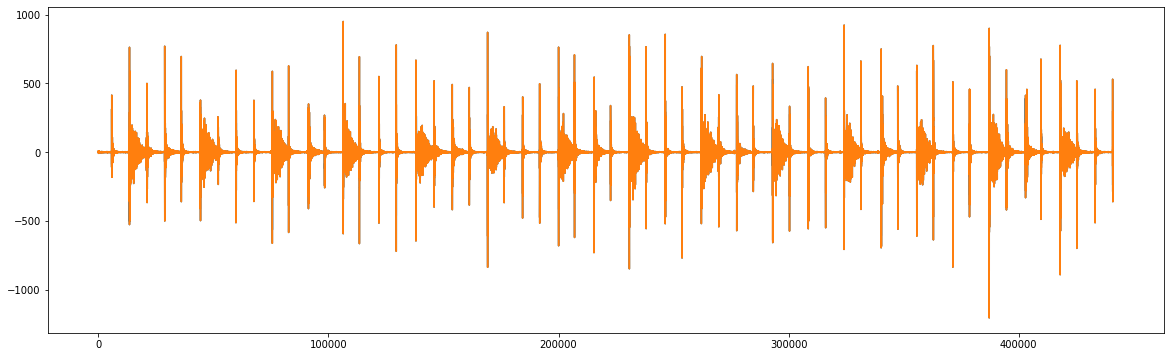

In [333]:
# la fel pt dreapta
freq_cutoff = 125

Y = np.fft.fft(right)
freq_db = 20*np.log10(abs(Y))
Y_cutoff[freq_db > freq_cutoff] = 0
X_cutoff = np.fft.ifft(Y_cutoff)
X_cutoff = np.real(X_cutoff)   

b, a = butter(3, samplerate / 10, btype='high', fs=samplerate)
butter_filtered = filtfilt(b, a, X_cutoff)
butter_tuned_right = medfilt(butter_filtered, kernel_size=7)

tobe = np.array((butter_tuned_left, butter_tuned_right)).T

sd.play(tobe, samplerate)
plt.plot(tobe)

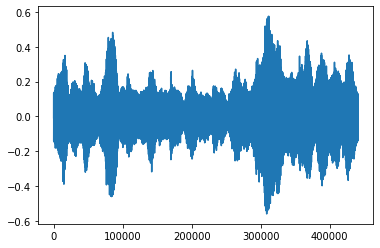

In [20]:
# clape = left - butter_tuned_left
import scipy.signal.windows as windows

freq_cutoff = 130

Y = np.fft.fft(left)
freq_db = 20*np.log10(abs(Y))
# Y_cutoff = Y.copy() * windows.blackmanharris(len(Y)) 
# Y_cutoff = Y.copy()
Y_cutoff = Y.copy() * windows.bohman(len(Y))
Y_cutoff[freq_db < freq_cutoff] = 0
X_cutoff = np.fft.ifft(Y_cutoff)
X_cutoff_left = np.real(X_cutoff)   

Y = np.fft.fft(right)
Y_cutoff = Y.copy() * windows.bohman(len(Y))
Y_cutoff[freq_db < freq_cutoff] = 0
X_cutoff = np.fft.ifft(Y_cutoff)
X_cutoff_right = np.real(X_cutoff)   
plt.plot(X_cutoff)


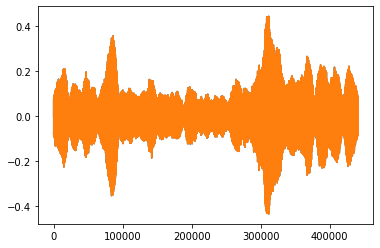

In [41]:
from scipy.signal import butter
b, a = butter(4, samplerate / 45, btype='high', fs=samplerate)
butter_filtered = filtfilt(b, a, X_cutoff)
butter_tuned_left = medfilt(butter_filtered, kernel_size=11)


b, a = butter(4, samplerate / 45, btype='high', fs=samplerate)
butter_filtered = filtfilt(b, a, X_cutoff)
butter_tuned_right = medfilt(butter_filtered, kernel_size=11)
keys = np.array((butter_tuned_left, butter_tuned_right)).T

sd.play(keys, samplerate)
plt.plot(keys)